
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




tibble [3,203 × 13] (S3: tbl_df/tbl/data.frame)
 $ Order ID     : chr [1:3203] "CA-2013-138688" "CA-2011-115812" "CA-2011-115812" "CA-2011-115812" ...
 $ Order Date   : POSIXct[1:3203], format: "2013-06-13" "2011-06-09" ...
 $ Ship Date    : POSIXct[1:3203], format: "2013-06-17" "2011-06-14" ...
 $ Status       : chr [1:3203] "On time" "Delay" "Delay" "Delay" ...
 $ Customer Name: chr [1:3203] "DarrinVanHuff" "BrosinaHoffman" "BrosinaHoffman" "BrosinaHoffman" ...
 $ Country      : chr [1:3203] "United States" "United States" "United States" "United States" ...
 $ City         : chr [1:3203] "Los Angeles" "Los Angeles" "Los Angeles" "Los Angeles" ...
 $ State        : chr [1:3203] "California" "California" "California" "California" ...
 $ Category     : chr [1:3203] "Labels" "Furnishings" "Art" "Phones" ...
 $ Product Name : chr [1:3203] "Self-Adhesive Address Labels for Typewriters by Universal" "Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood" "Newell 322" "Mitel 5320

   Order ID           Order Date                    Ship Date                  
 Length:3203        Min.   :2011-01-07 00:00:00   Min.   :2011-01-09 00:00:00  
 Class :character   1st Qu.:2012-05-22 00:00:00   1st Qu.:2012-05-26 00:00:00  
 Mode  :character   Median :2013-07-22 00:00:00   Median :2013-07-25 00:00:00  
                    Mean   :2013-05-10 03:06:07   Mean   :2013-05-14 01:25:25  
                    3rd Qu.:2014-05-23 00:00:00   3rd Qu.:2014-05-27 00:00:00  
                    Max.   :2014-12-31 00:00:00   Max.   :2015-01-06 00:00:00  
    Status          Customer Name        Country              City          
 Length:3203        Length:3203        Length:3203        Length:3203       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                       

# A tibble: 17 × 2
   Category    Total_Sales
   <chr>             <dbl>
 1 Accessories      61114.
 2 Appliances       30236.
 3 Art               9212.
 4 Binders          55961.
 5 Bookcases        36004.
 6 Chairs          101781.
 7 Copiers          49749.
 8 Envelopes         4118.
 9 Fasteners          923.
10 Furnishings      30073.
11 Labels            5079.
12 Machines         42444.
13 Paper            26664.
14 Phones           98684.
15 Storage          70533.
16 Supplies         18127.
17 Tables           84755.
# A tibble: 48 × 2
   Month   Total_Sales
   <chr>         <dbl>
 1 2011-01       2648.
 2 2011-02       1349.
 3 2011-03      11009.
 4 2011-04       9343.
 5 2011-05       6570.
 6 2011-06       9629.
 7 2011-07      21809.
 8 2011-08      13248.
 9 2011-09      14901.
10 2011-10       8729.
# ℹ 38 more rows


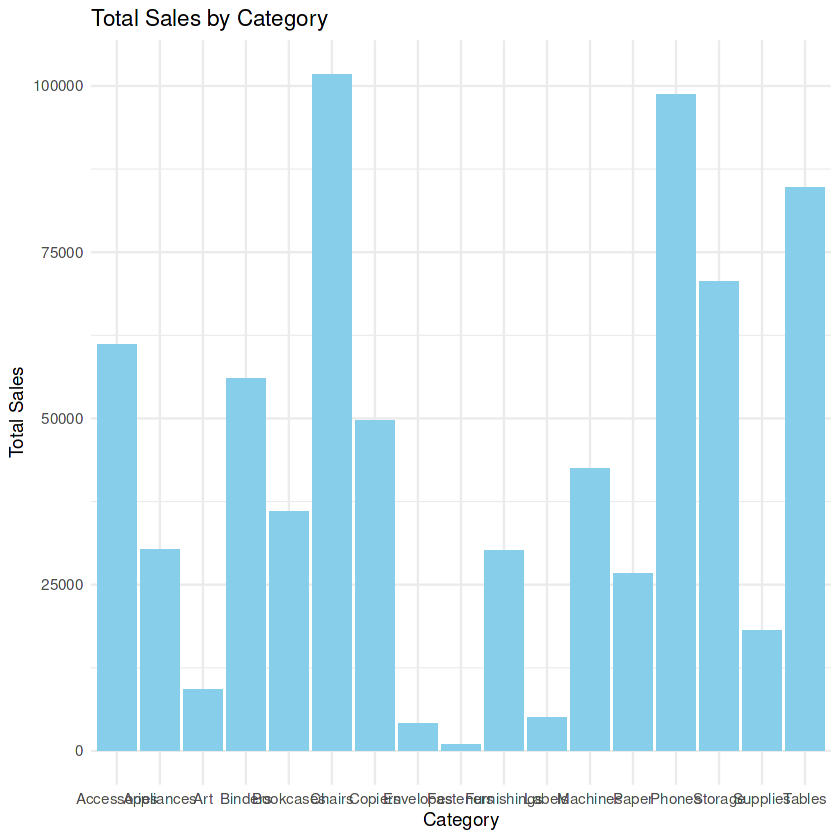

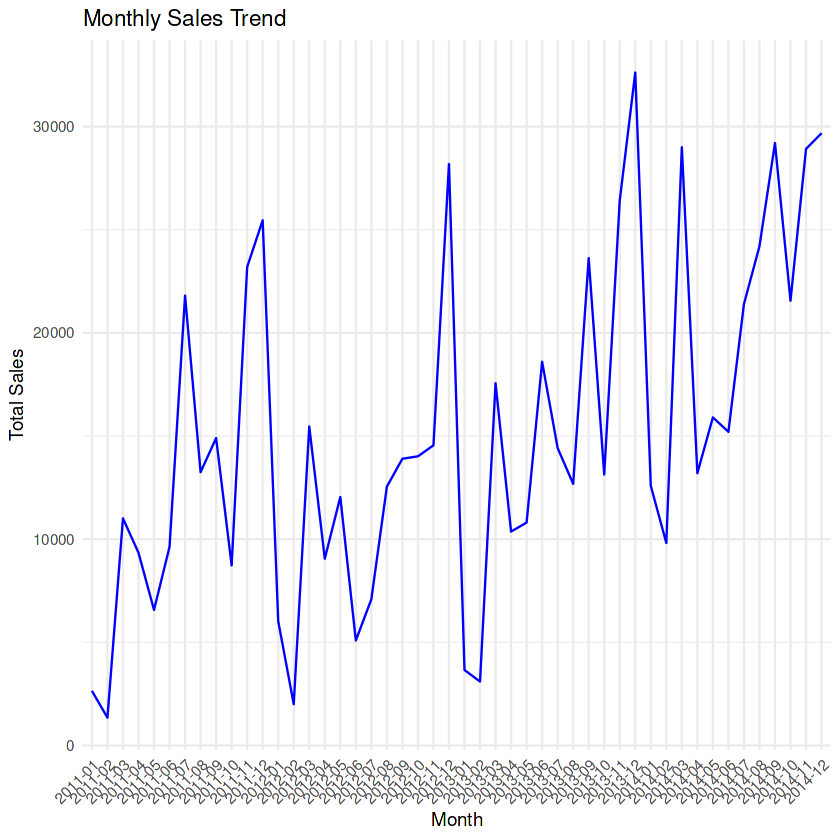

In [1]:
# Load necessary libraries
library(readxl)
library(dplyr)
library(ggplot2)

# Load the data
file_path <- "/kaggle/input/sales-dashboard/Amazon 1 Final.xlsx"
sheets <- excel_sheets(file_path)
data_list <- lapply(sheets, function(sheet) read_excel(file_path, sheet = sheet))

# Assuming the main data is in the first sheet
data <- data_list[[1]]

# View the structure of the data
str(data)

# Summary of the data
summary(data)

# Data Cleaning
# Renaming columns for easier reference
data <- data %>%
  rename(
    OrderID = `Order ID`,
    Product = `Product Name`,
    Date = `Order Date`
  )

# Handling missing values
data <- data %>%
  filter(!is.na(Sales))

# Data Analysis
# Sales summary by category
sales_summary <- data %>%
  group_by(Category) %>%
  summarise(Total_Sales = sum(Sales))

print(sales_summary)

# Convert Date column to Date type
data$Date <- as.Date(data$Date)

# Monthly sales trend
monthly_sales <- data %>%
  mutate(Month = format(Date, "%Y-%m")) %>%
  group_by(Month) %>%
  summarise(Total_Sales = sum(Sales))

print(monthly_sales)

# Data Visualization
# Sales by category bar plot
ggplot(sales_summary, aes(x = Category, y = Total_Sales)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(title = "Total Sales by Category", x = "Category", y = "Total Sales")

# Monthly sales trend line plot
ggplot(monthly_sales, aes(x = Month, y = Total_Sales)) +
  geom_line(group = 1, color = "blue") +
  theme_minimal() +
  labs(title = "Monthly Sales Trend", x = "Month", y = "Total Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

---
title: "Data Analysis and Visualization Report"
author: "Your Name"
date: "`r Sys.Date()`"
output: html_document
---

```{r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
library(readxl)
library(dplyr)
library(ggplot2)

file_path <- "/kaggle/input/sales-dashboard/Amazon 1 Final.xlsx"
sheets <- excel_sheets(file_path)
data_list <- lapply(sheets, function(sheet) read_excel(file_path, sheet = sheet))
data <- data_list[[1]]

str(data)
summary(data)

data <- data %>%
  rename(
    OrderID = `Order ID`,
    Product = `Product Name`,
    Date = `Order Date`
  )

data <- data %>%
  filter(!is.na(Sales))
  
sales_summary <- data %>%
  group_by(Category) %>%
  summarise(Total_Sales = sum(Sales))

print(sales_summary)

ggplot(sales_summary, aes(x = Category, y = Total_Sales)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  theme_minimal() +
  labs(title = "Total Sales by Category", x = "Category", y = "Total Sales")
data$Date <- as.Date(data$Date)

monthly_sales <- data %>%
  mutate(Month = format(Date, "%Y-%m")) %>%
  group_by(Month) %>%
  summarise(Total_Sales = sum(Sales))

print(monthly_sales)
ggplot(monthly_sales, aes(x = Month, y = Total_Sales)) +
  geom_line(group = 1, color = "blue") +
  theme_minimal() +
  labs(title = "Monthly Sales Trend", x = "Month", y = "Total Sales") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

### Steps for Using the R Markdown Template:

1. **Open a new R Markdown file** in RStudio or any other R Markdown compatible editor.
2. **Paste the R Markdown template** provided above into the file.
3. **Run the R Markdown file** to generate an HTML report.

This approach separates the code execution and report generation, ensuring clarity and minimizing errors.

